# Qbus6810 group assignment

## Table of Content: 
* [1. Data cleaning and processing](#section_1_1)

    * [A) Data Cleaning](#section_1_2)
    * [B) Setting Dummy Variables](#section2_3)

* [2. Exploratory Data Analysis and Feature Engineering](#section2_1)
     
     * [A) Box Plot](#section2_2)
     * [B) Setting response and predictors](#section2_4)
     * [C) Distribution of Price](#section2_5)     
     * [D) Scatter Plot](#section2_6)     
     * [E) Regression plot of predictors](#section2_7)    
     * [F) Correlation of Price against Numerical Variables](#section2_8)     
     * [G) EDA - Location](#section2_10)    
     * [H) Feature engineering - Location](#section2_11)
* [3.Model building](#section3_1)
     * [A) OLS](#section3_2)
     * [B) Ridge regression](#section3_3)
     * [C) Lasso](#section3_4)
     * [D) Elastic Net](#section3_5)
     * [E) Decision Tree](#section3_8)
     * [F) RandomForestRegressor](#section3_9)
     * [G) XGboosting](#section3_10)
     * [I) Model Stacking](#section3_12)
* [Futher work](#chapter2)

## 1. Data cleaning and processing :  <a class="anchor" id="section_1_1"></a >

In [1]:
import numpy as np 
import scipy as sp
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.linear_model import LinearRegression, RidgeCV
from sklearn.ensemble import RandomForestRegressor 
from sklearn.model_selection import RandomizedSearchCV
from sklearn.pipeline import Pipeline 
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import statsmodels.api as sm
import warnings 
warnings.filterwarnings("ignore")

In [2]:
#importing data source
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

train.head()

,Id,price,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_identity_verified,latitude,longitude,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,reviews_per_month
0,2000,199,within an hour,1.00,1.00,t,5,f,-33.918732,151.242035,...,10.0,9.0,10.0,10.0,10.0,t,flexible,f,f,0.23
1,2001,95,NaN,NaN,0.83,t,1,f,-33.698425,151.290979,...,10.0,10.0,10.0,10.0,10.0,t,moderate,f,f,0.83
2,2002,156,within an hour,0.91,0.98,f,8,f,-33.847388,151.072890,...,9.0,10.0,10.0,10.0,9.0,f,strict_14_with_grace_period,f,f,6.90
3,2003,100,within an hour,0.99,0.97,f,260,f,-33.870261,151.195131,...,10.0,10.0,10.0,10.0,10.0,t,strict_14_with_grace_period,f,f,1.32
4,2004,100,within a day,1.00,NaN,f,1,f,-33.908168,151.211849,...,NaN,NaN,NaN,NaN,NaN,f,moderate,f,f,0.07


## A) Dataset Cleaning:  <a class="anchor" id="section_1_2"></a >

In [3]:
#training set data cleaning pahse
train['review_scores_rating'].fillna(np.mean(train['review_scores_rating']),inplace=True)
    #fill na with mean of this column
train['review_scores_accuracy'].fillna(np.mean(train['review_scores_accuracy']),inplace=True)
    #fill na with mean of this column
train['review_scores_checkin'].fillna(np.mean(train['review_scores_checkin']),inplace=True)
    #fill na with mean of this column
train['review_scores_communication'].fillna(np.mean(train['review_scores_communication']),inplace=True)
    #fill na with mean of this column
train['review_scores_location'].fillna(np.mean(train['review_scores_location']),inplace=True)
    #fill na with mean of this column
train['review_scores_value'].fillna(np.mean(train['review_scores_value']),inplace=True)
    #fill na with mean of this column
train['review_scores_cleanliness'].fillna(np.mean(train['review_scores_cleanliness']),inplace=True)
    #fill na with mean of this column
train['reviews_per_month'].fillna(np.mean(train['reviews_per_month']),inplace=True)
    #fill na with mean of this column
train['host_response_time'].fillna(('no response'),inplace=True)
    #fill na with no response
train['host_response_rate'].fillna((0),inplace=True)
    #fill na with 0, the same logic as above
train['host_acceptance_rate'].fillna((0),inplace=True)
    #fill na with 0, meaning the host did not accept
train['security_deposit'].fillna((train['security_deposit'].median()),inplace=True) 
    #replace with median
train['cleaning_fee'].fillna((test['cleaning_fee'].median()),inplace=True) 
    #replace with median 
train.loc[train['bedrooms'].isnull(),'bedrooms'] = train.loc[train['bedrooms'].isnull(),'bathrooms'] 
    #assume na bedrooms is the same value as number of bathrooms
train.loc[train['beds'].isnull(),'beds'] = train.loc[train['beds'].isnull(),'bedrooms']
    #assume na beds is the same value as number of bedrooms
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 36 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Id                                2000 non-null   int64  
 1   price                             2000 non-null   int64  
 2   host_response_time                2000 non-null   object 
 3   host_response_rate                2000 non-null   float64
 4   host_acceptance_rate              2000 non-null   float64
 5   host_is_superhost                 2000 non-null   object 
 6   host_listings_count               2000 non-null   int64  
 7   host_identity_verified            2000 non-null   object 
 8   latitude                          2000 non-null   float64
 9   longitude                         2000 non-null   float64
 10  property_type                     2000 non-null   object 
 11  room_type                         2000 non-null   object 
 12  accomm

In [4]:
train_cleansed1 = train.replace({'f':0,'t':1})
    #change all string true false values into bolean for the purpose of review
train_cleansed1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 36 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Id                                2000 non-null   int64  
 1   price                             2000 non-null   int64  
 2   host_response_time                2000 non-null   object 
 3   host_response_rate                2000 non-null   float64
 4   host_acceptance_rate              2000 non-null   float64
 5   host_is_superhost                 2000 non-null   int64  
 6   host_listings_count               2000 non-null   int64  
 7   host_identity_verified            2000 non-null   int64  
 8   latitude                          2000 non-null   float64
 9   longitude                         2000 non-null   float64
 10  property_type                     2000 non-null   object 
 11  room_type                         2000 non-null   object 
 12  accomm

In [5]:
    
train_cleansed1['property_type']=np.where(train_cleansed1['property_type'].str.contains('House'),'House',
np.where(train_cleansed1['property_type'].str.contains('Apartment'),'Apartment',
np.where(train_cleansed1['property_type'].str.contains('Townhouse'),'Townhouse',
'Other')))

train_cleansed1.to_csv ('cleaned.csv')
train_cleansed1.info()
train_cleansed1['property_type'].value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 36 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Id                                2000 non-null   int64  
 1   price                             2000 non-null   int64  
 2   host_response_time                2000 non-null   object 
 3   host_response_rate                2000 non-null   float64
 4   host_acceptance_rate              2000 non-null   float64
 5   host_is_superhost                 2000 non-null   int64  
 6   host_listings_count               2000 non-null   int64  
 7   host_identity_verified            2000 non-null   int64  
 8   latitude                          2000 non-null   float64
 9   longitude                         2000 non-null   float64
 10  property_type                     2000 non-null   object 
 11  room_type                         2000 non-null   object 
 12  accomm

Apartment    1327
House         423
Other         172
Townhouse      78
Name: property_type, dtype: int64

In [6]:
test['review_scores_rating'].fillna(np.mean(test['review_scores_rating']),inplace=True)
test['review_scores_accuracy'].fillna(np.mean(test['review_scores_accuracy']),inplace=True)
test['review_scores_checkin'].fillna(np.mean(test['review_scores_checkin']),inplace=True)
test['review_scores_communication'].fillna(np.mean(test['review_scores_communication']),inplace=True)
test['review_scores_location'].fillna(np.mean(test['review_scores_location']),inplace=True)
test['review_scores_value'].fillna(np.mean(test['review_scores_value']),inplace=True)
test['review_scores_cleanliness'].fillna(np.mean(test['review_scores_cleanliness']),inplace=True)
test['reviews_per_month'].fillna(np.mean(test['reviews_per_month']),inplace=True)
test['host_response_time'].fillna(('no response'),inplace=True)
test['host_response_rate'].fillna((0),inplace=True)
test['host_acceptance_rate'].fillna((0),inplace=True)
test['security_deposit'].fillna((test['security_deposit'].median()),inplace=True) #replace with median
test['cleaning_fee'].fillna((test['cleaning_fee'].median()),inplace=True) #replace with median 
test.loc[test['bedrooms'].isnull(),'bedrooms'] = test.loc[test['bedrooms'].isnull(),'bathrooms'] 
        #assume na bedrooms is the same value as number of bathrooms
test.loc[test['beds'].isnull(),'beds'] = test.loc[test['beds'].isnull(),'bedrooms']
        #assume na beds is the same value as number of bedrooms
test_cleansed = test.replace({'f':0,'t':1})
#train_subset.to_csv ('cleaned.csv')
test_cleansed.info()

test_cleansed['property_type']=np.where(test_cleansed['property_type'].str.contains('House'),'House',
np.where(test_cleansed['property_type'].str.contains('Apartment'),'Apartment',
np.where(test_cleansed['property_type'].str.contains('Townhouse'),'Townhouse',
'Other')))

test_cleansed['host_response_time'].value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 35 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Id                                2000 non-null   int64  
 1   host_response_time                2000 non-null   object 
 2   host_response_rate                2000 non-null   float64
 3   host_acceptance_rate              2000 non-null   float64
 4   host_is_superhost                 2000 non-null   int64  
 5   host_listings_count               2000 non-null   int64  
 6   host_identity_verified            2000 non-null   int64  
 7   latitude                          2000 non-null   float64
 8   longitude                         2000 non-null   float64
 9   property_type                     2000 non-null   object 
 10  room_type                         2000 non-null   object 
 11  accommodates                      2000 non-null   int64  
 12  bathro

no response           976
within an hour        699
within a few hours    162
within a day          129
a few days or more     34
Name: host_response_time, dtype: int64

In [7]:
def prepare_data(df):
    df['within an hour']=(df['host_response_time']=='within an hour').astype(int)
    df['within a few hours']=(df['host_response_time']=='within a few hours').astype(int)
    df['within a day']=(df['host_response_time']=='within a day').astype(int)
    df['a few days or more']=(df['host_response_time']=='a few days or more').astype(int)
    df['House']=(df['property_type']=='House').astype(int)
    df['Townhouse']=(df['property_type']=='Townhouse').astype(int)
    df['Other']=(df['property_type']=='Other').astype(int)
    df['Entire home/apt']=(df['room_type']=='Entire home/apt').astype(int)
    df['Private room']=(df['room_type']=='Private room').astype(int)
    df['Shared room']=(df['room_type']=='Shared room').astype(int)
    df['Futon']=(df['bed_type']=='Futon').astype(int)
    df['Pull-out Sofa']=(df['bed_type']=='Pull-out Sofa').astype(int)
    df['Airbed']=(df['bed_type']=='Airbed').astype(int)
    df['moderate']=(df['cancellation_policy']=="moderate").astype(int)
    df['strict_14_with_grace_period']=(df['cancellation_policy']=="strict_14_with_grace_period").astype(int)
    df['super_strict_60']=(df['cancellation_policy']=="super_strict_60").astype(int)
    df['super_strict_30']=(df['cancellation_policy']=="super_strict_30").astype(int)
    df=df.loc[:, df.dtypes!='object'] # discards the columns that are not numerical


    return df

train_cleansed = prepare_data(train_cleansed1)
test_cleansed= prepare_data(test_cleansed)


train_cleansed.head()

,Id,price,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_identity_verified,latitude,longitude,accommodates,...,Entire home/apt,Private room,Shared room,Futon,Pull-out Sofa,Airbed,moderate,strict_14_with_grace_period,super_strict_60,super_strict_30
0,2000,199,1.00,1.00,1,5,0,-33.918732,151.242035,2,...,0,0,0,0,0,0,0,0,0,0
1,2001,95,0.00,0.83,1,1,0,-33.698425,151.290979,4,...,1,0,0,0,0,0,1,0,0,0
2,2002,156,0.91,0.98,0,8,0,-33.847388,151.072890,4,...,1,0,0,0,0,0,0,1,0,0
3,2003,100,0.99,0.97,0,260,0,-33.870261,151.195131,2,...,1,0,0,0,0,0,0,1,0,0
4,2004,100,1.00,0.00,0,1,0,-33.908168,151.211849,1,...,0,1,0,0,0,0,1,0,0,0


In [8]:
# delete outliers
train_cleansed = train_cleansed[train_cleansed['host_listings_count'] < 200]
train_cleansed = train_cleansed[train_cleansed['accommodates'] < 12]
train_cleansed = train_cleansed[train_cleansed['bathrooms'] < 10]
train_cleansed = train_cleansed[train_cleansed['beds'] < 10]
train_cleansed = train_cleansed[train_cleansed['security_deposit'] < 4000]
train_cleansed = train_cleansed[train_cleansed['guests_included'] < 12]
train_cleansed = train_cleansed[train_cleansed['extra_people'] < 200]
train_cleansed = train_cleansed[train_cleansed['minimum_nights'] < 150]
train_cleansed = train_cleansed[train_cleansed['number_of_reviews'] < 400]
train_cleansed = train_cleansed[train_cleansed['reviews_per_month'] < 10]
train_cleansed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1975 entries, 0 to 1999
Data columns (total 48 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Id                                1975 non-null   int64  
 1   price                             1975 non-null   int64  
 2   host_response_rate                1975 non-null   float64
 3   host_acceptance_rate              1975 non-null   float64
 4   host_is_superhost                 1975 non-null   int64  
 5   host_listings_count               1975 non-null   int64  
 6   host_identity_verified            1975 non-null   int64  
 7   latitude                          1975 non-null   float64
 8   longitude                         1975 non-null   float64
 9   accommodates                      1975 non-null   int64  
 10  bathrooms                         1975 non-null   float64
 11  bedrooms                          1975 non-null   float64
 12  beds  

## 2. Exploratory Data Analysis and Feature Engineering <a class="anchor" id="section2_1"></a >

## A) Box Plot <a class="anchor" id="section2_2"></a >

In [9]:
# Plot settings
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_context('notebook') 
sns.set_style('ticks') 
colours = ['#1F77B4', '#FF7F0E', '#2CA02C', '#DB2728', '#9467BD', '#8C564B', '#E377C2','#7F7F7F', '#BCBD22', '#17BECF']
crayon = ['#4E79A7','#F28E2C','#E15759','#76B7B2','#59A14F', '#EDC949','#AF7AA1','#FF9DA7','#9C755F','#BAB0AB']
sns.set_palette(colours)
%matplotlib inline
plt.rcParams['figure.figsize'] = (9,6)

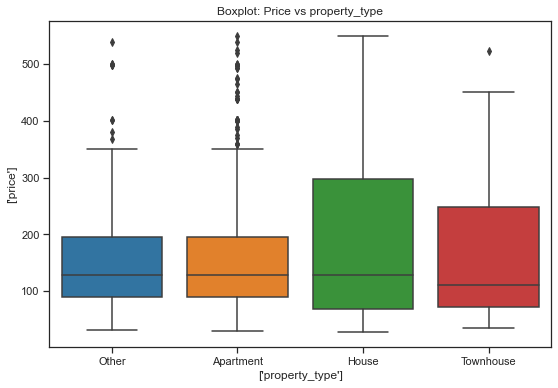

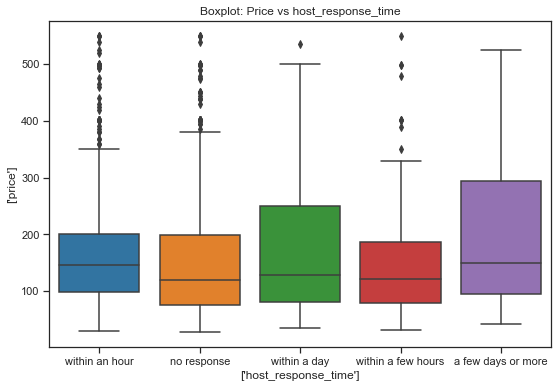

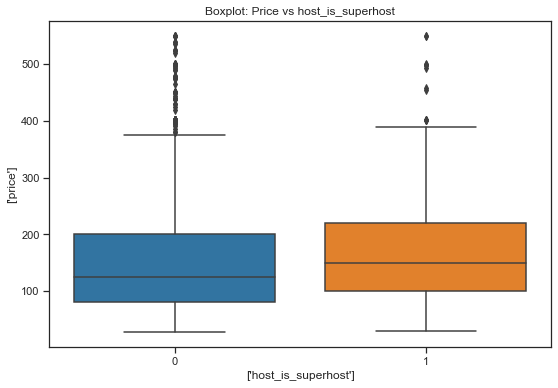

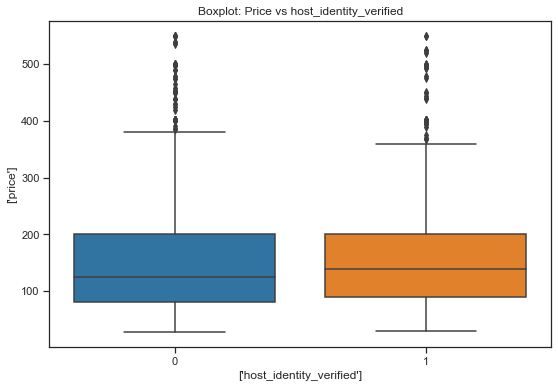

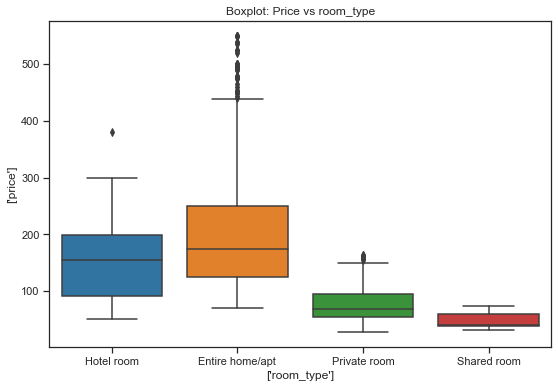

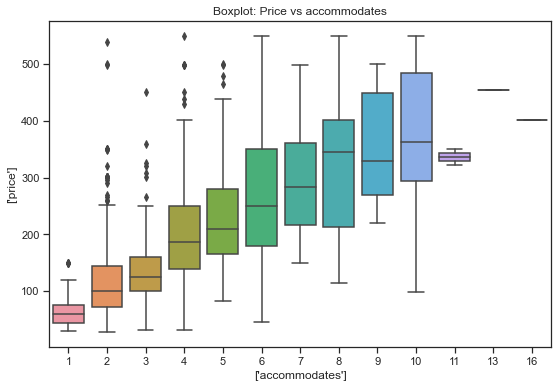

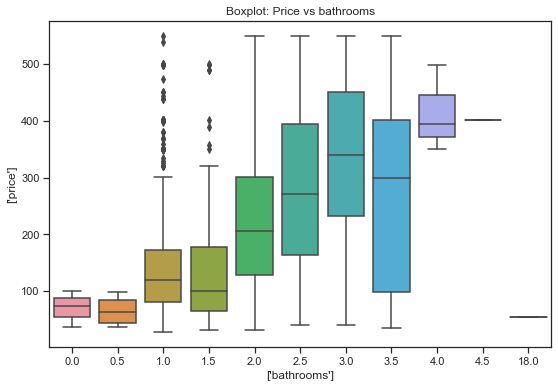

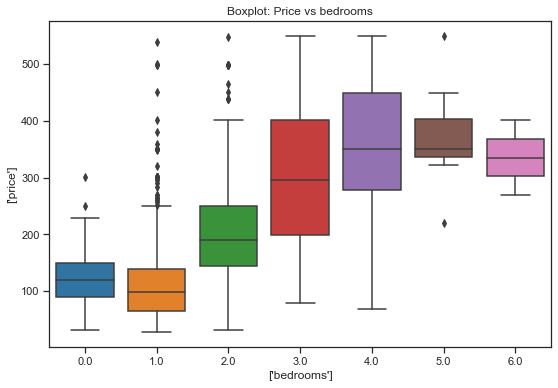

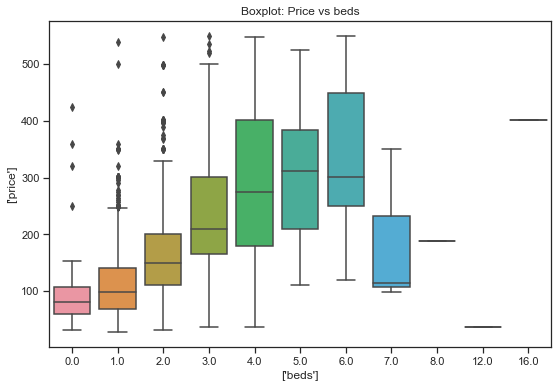

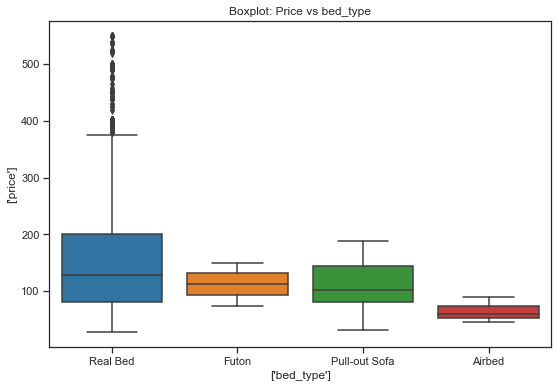

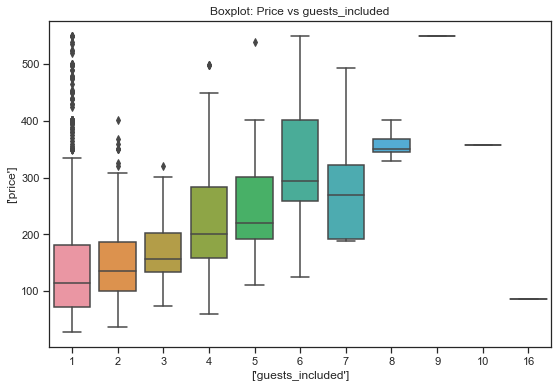

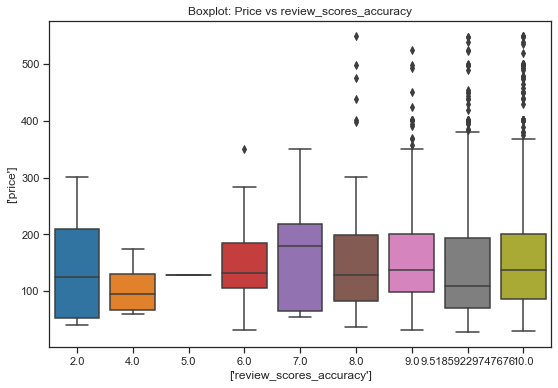

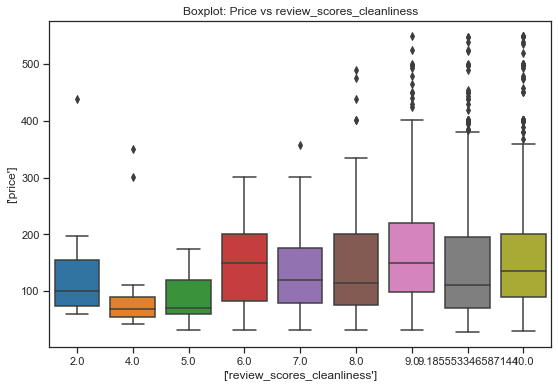

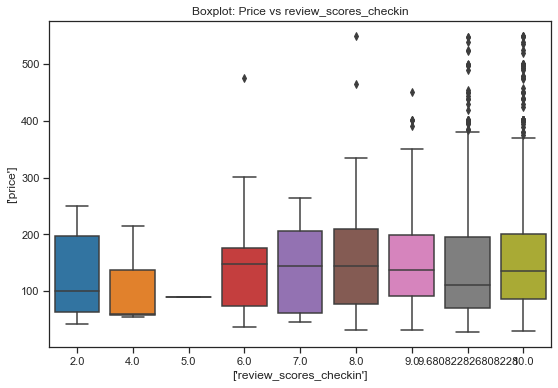

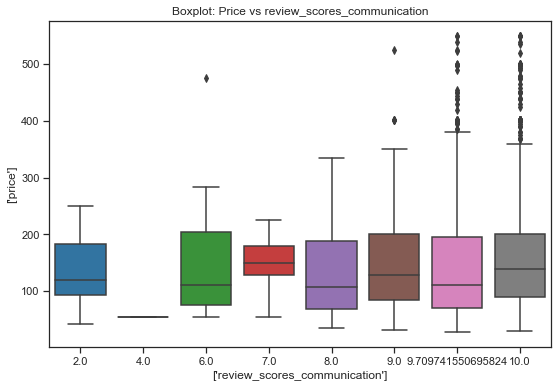

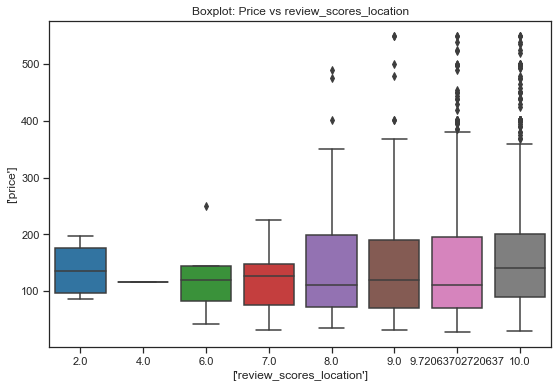

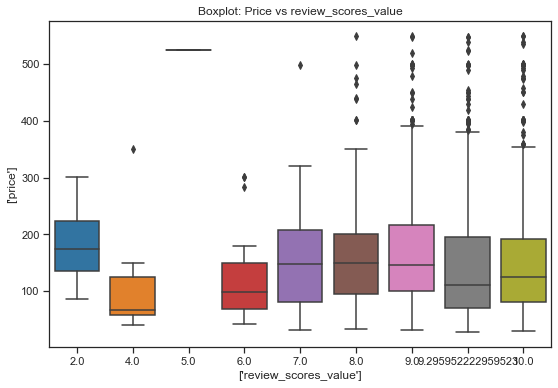

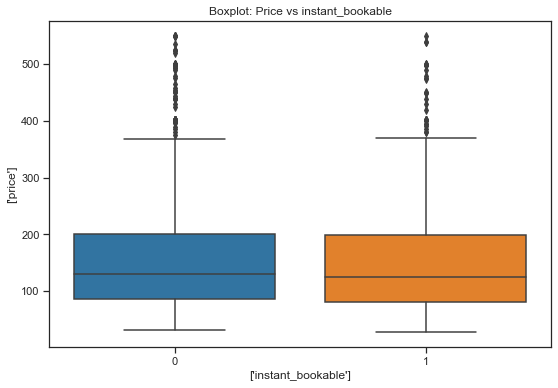

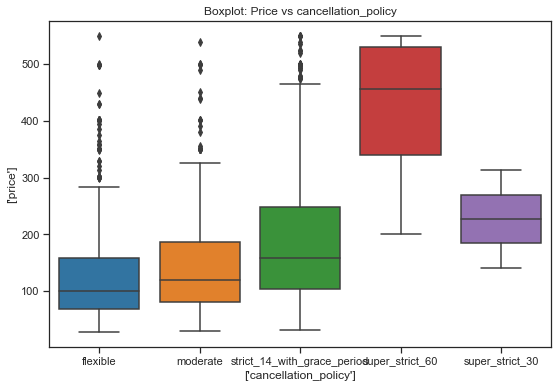

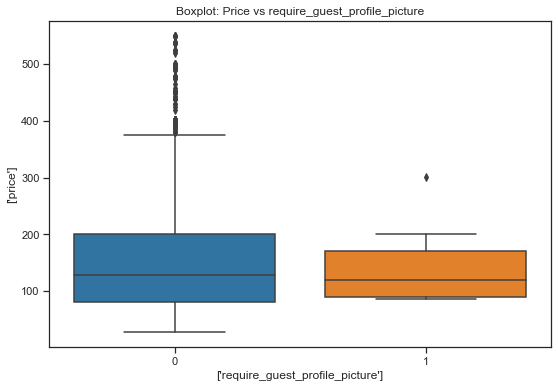

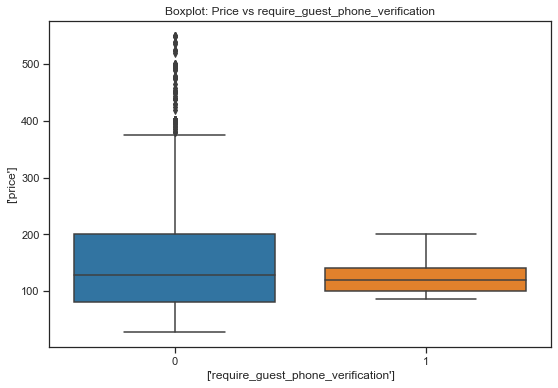

<Figure size 648x432 with 0 Axes>

In [103]:
independent_variable=['property_type','host_response_time','host_is_superhost', 'host_identity_verified', 'room_type','accommodates',
                     'bathrooms','bedrooms','beds','bed_type','guests_included','review_scores_accuracy','review_scores_cleanliness',
                      'review_scores_checkin','review_scores_communication','review_scores_location','review_scores_value',
                     'instant_bookable','cancellation_policy','require_guest_profile_picture','require_guest_phone_verification']

dependent_variable=['price']

for i in range(len(independent_variable)):
    sns.boxplot(train_cleansed1[independent_variable[i]],train_cleansed1[dependent_variable[0]])
    plt.xlabel(str([independent_variable[i]]))
    plt.ylabel(str([dependent_variable[0]]))
    plt.title("Boxplot: Price vs "+str(independent_variable[i]))
    plt.show()
    plt.savefig("Boxplot: Price vs "+independent_variable[i])


## B) Setting response and predictors <a class="anchor" id="section2_4"></a >

In [10]:
response="price"
predictors=list(train_cleansed.columns.values[2:44])

x_train=train_cleansed[predictors].copy()
y_train=train_cleansed[response].copy()

In [11]:
print(x_train.head())

   host_response_rate  host_acceptance_rate  host_is_superhost  \
0                1.00                  1.00                  1   
1                0.00                  0.83                  1   
2                0.91                  0.98                  0   
4                1.00                  0.00                  0   
5                1.00                  1.00                  0   

   host_listings_count  host_identity_verified   latitude   longitude  \
0                    5                       0 -33.918732  151.242035   
1                    1                       0 -33.698425  151.290979   
2                    8                       0 -33.847388  151.072890   
4                    1                       0 -33.908168  151.211849   
5                    1                       0 -33.899464  151.211363   

   accommodates  bathrooms  bedrooms  ...  a few days or more  House  \
0             2        1.0       0.0  ...                   0      0   
1             4     

## C) Distribution of Price <a class="anchor" id="section2_5"></a >

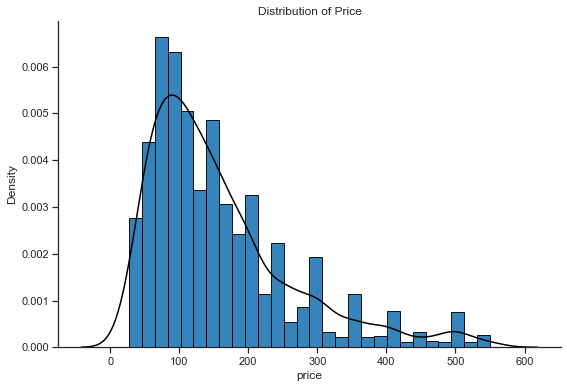

In [106]:
from statlearning import plot_dist

plot_dist(y_train)
plt.title('Distribution of Price')
plt.show()

## D) Scatter Plot <a class="anchor" id="section2_6"></a >

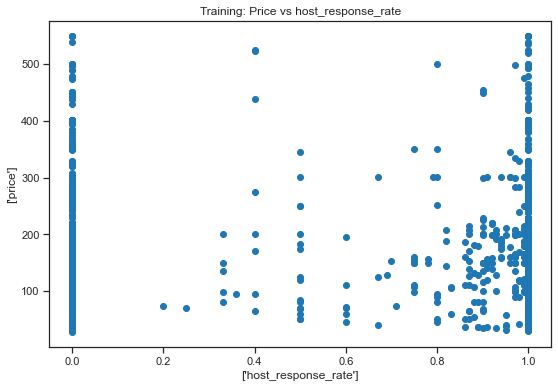

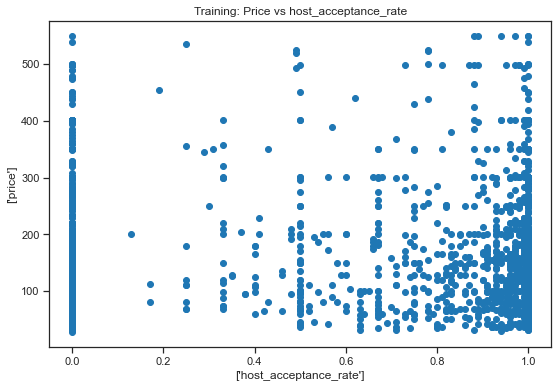

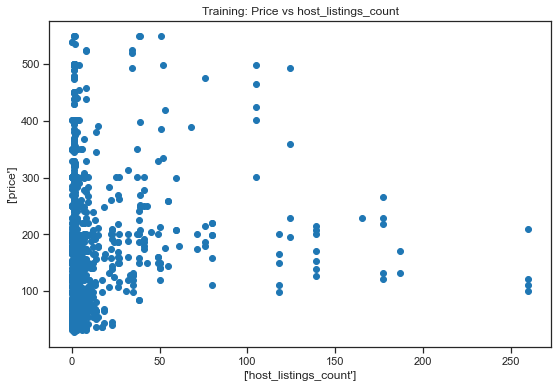

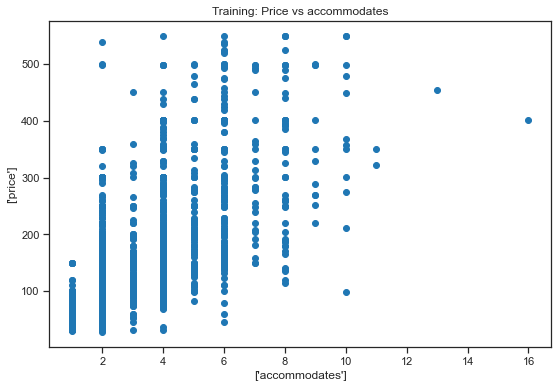

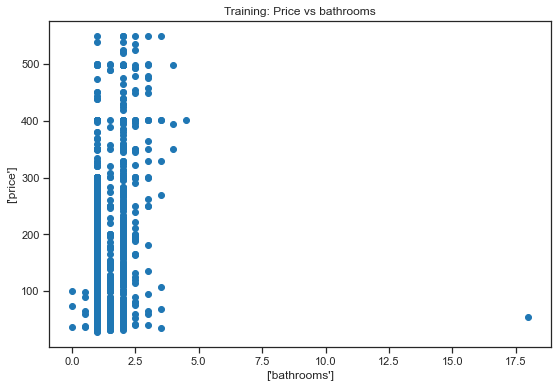

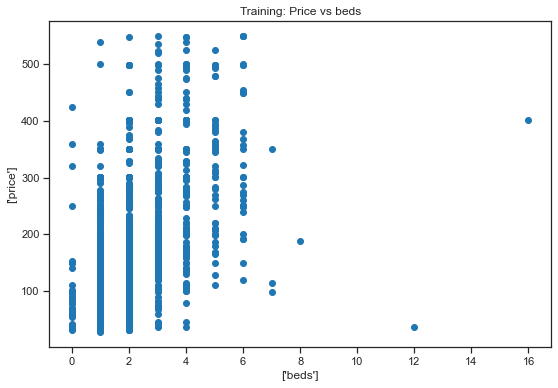

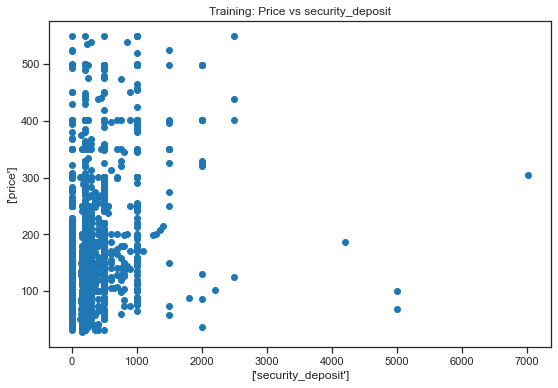

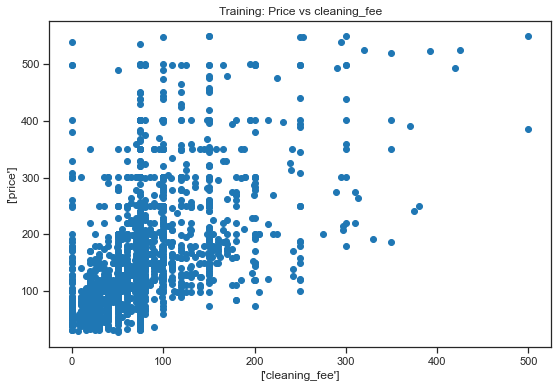

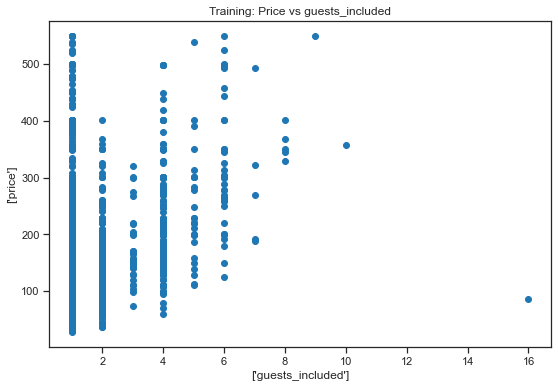

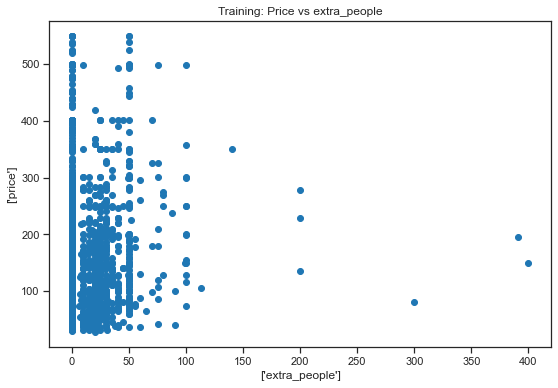

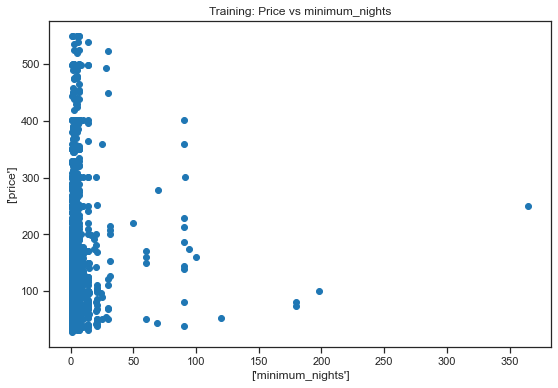

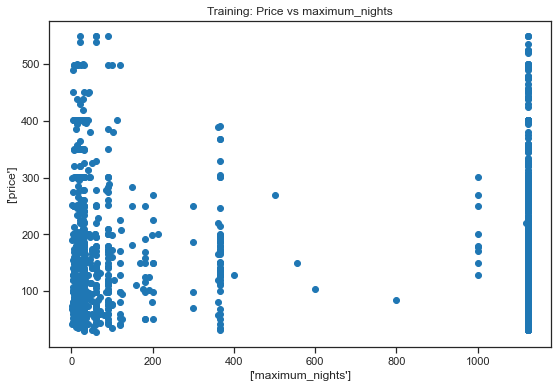

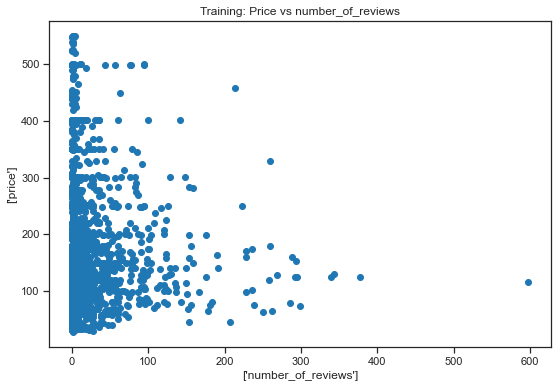

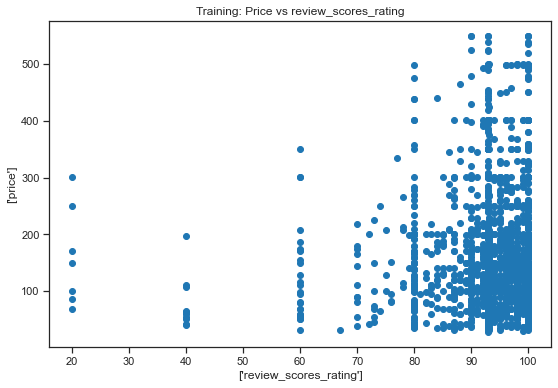

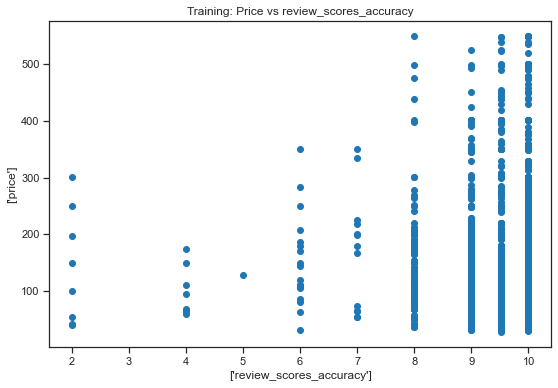

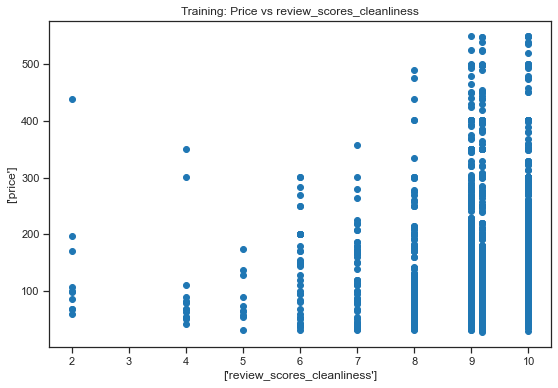

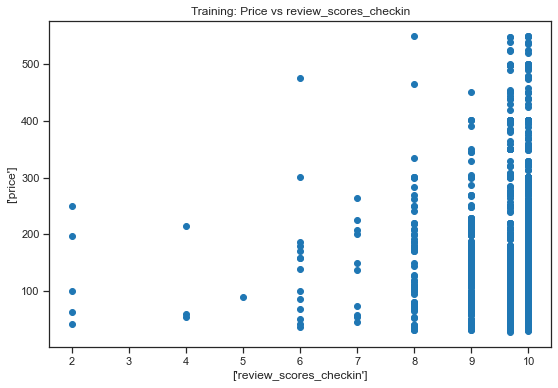

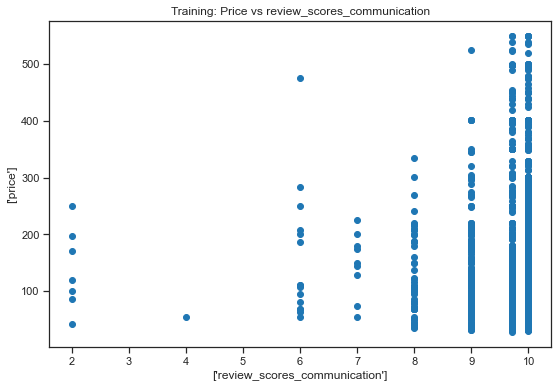

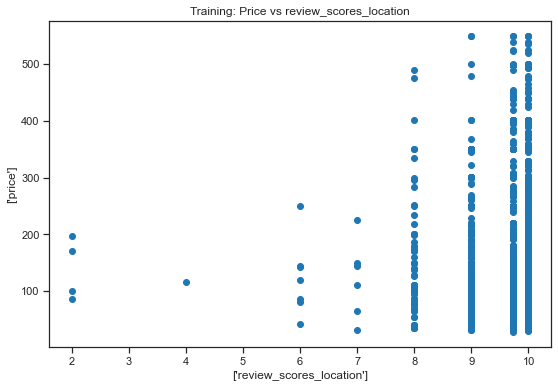

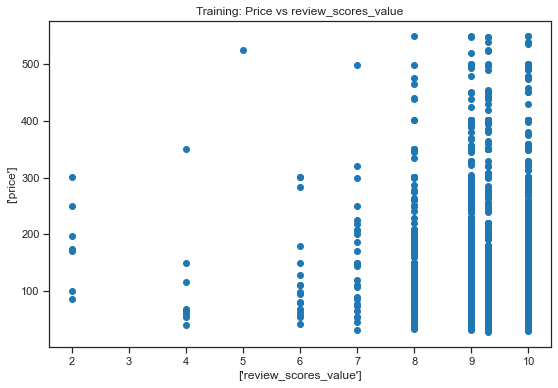

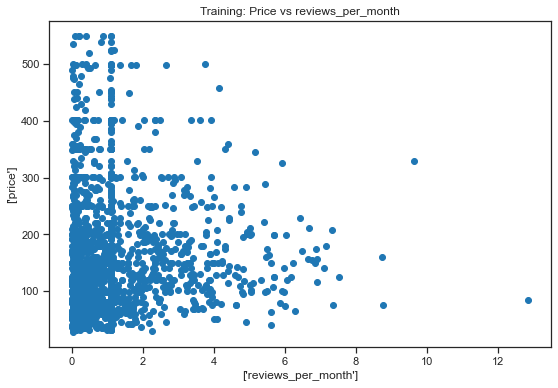

In [107]:
independent_variable=['host_response_rate','host_acceptance_rate','host_listings_count','accommodates','bathrooms','beds','security_deposit',
'cleaning_fee','guests_included','extra_people','minimum_nights','maximum_nights','number_of_reviews',
'review_scores_rating','review_scores_accuracy','review_scores_cleanliness','review_scores_checkin',
'review_scores_communication','review_scores_location','review_scores_value','reviews_per_month']

dependent_variable=['price']

for i in range(len(independent_variable)):
    plt.scatter(train[independent_variable[i]],train[dependent_variable[0]])
    plt.xlabel(str([independent_variable[i]]))
    plt.ylabel(str([dependent_variable[0]]))
    plt.title("Training: Price vs "+str(independent_variable[i]))
    plt.savefig("price vs "+independent_variable[i])
    plt.show()


## E) Regression plot of predictors <a class="anchor" id="section2_7"></a >

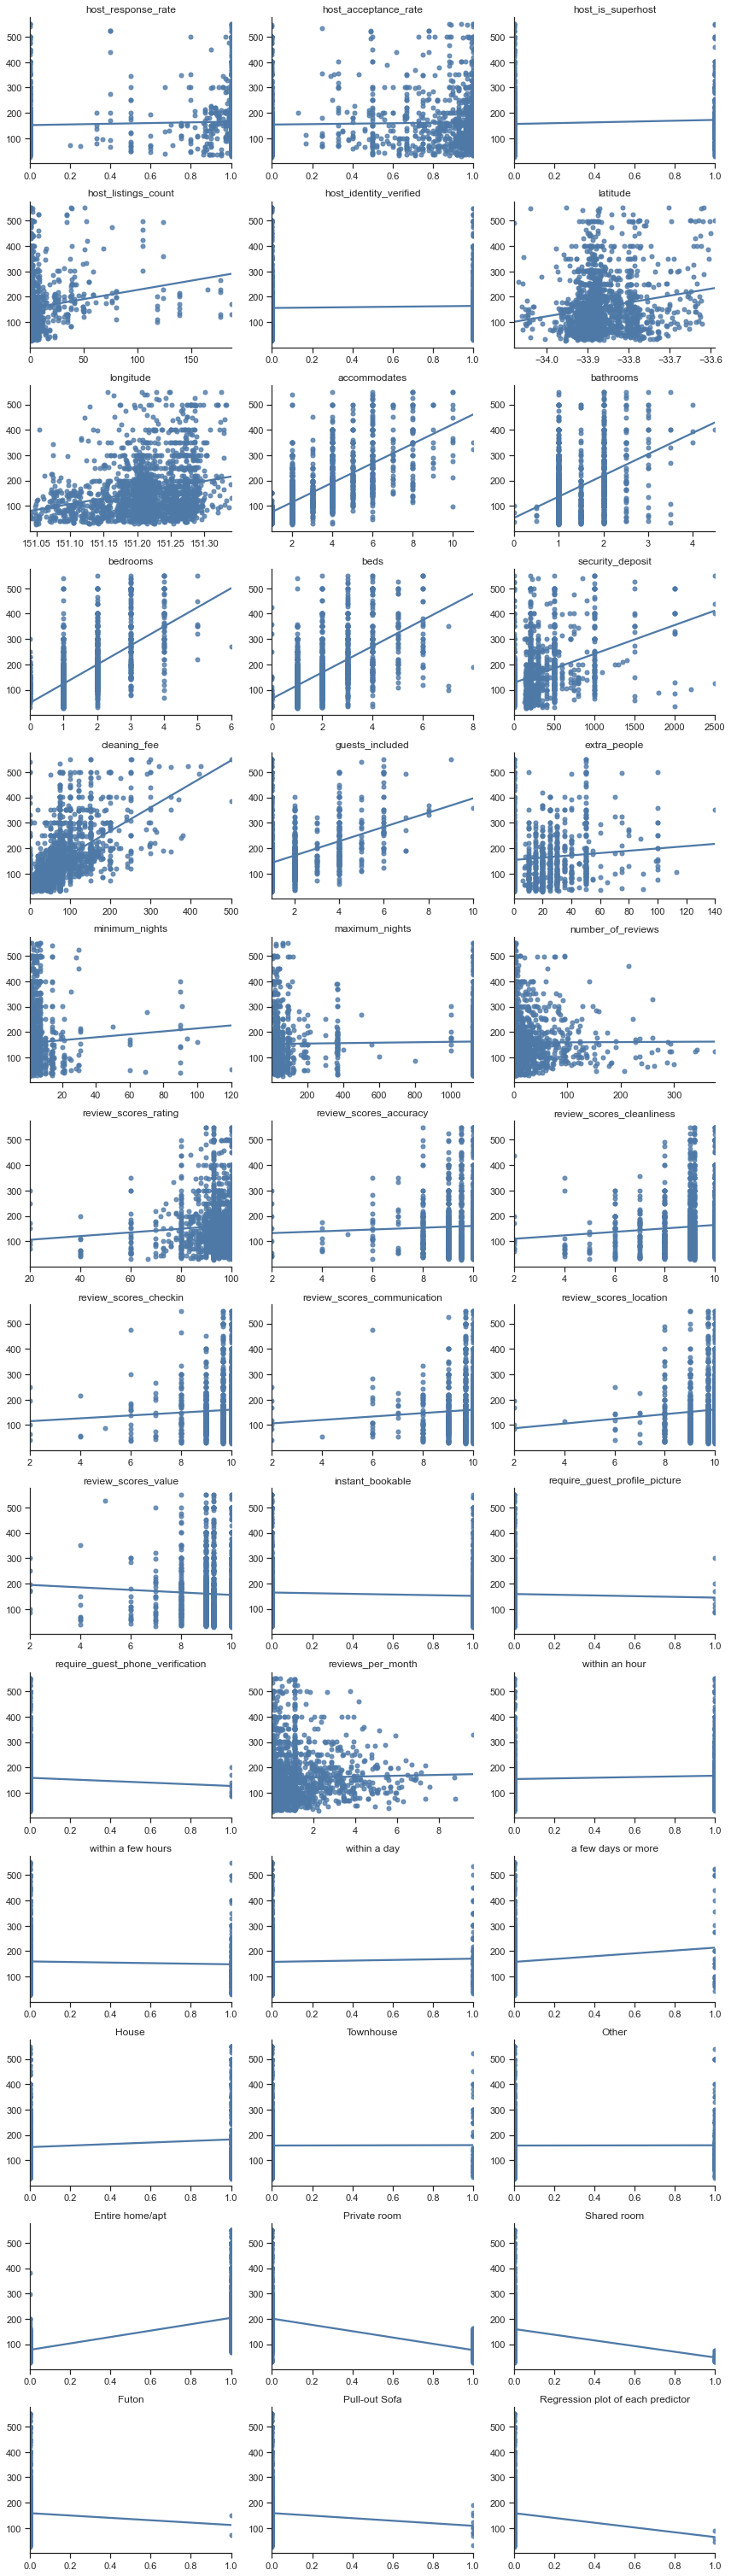

In [15]:
from statlearning import plot_regressions

with sns.color_palette(crayon):
    plot_regressions(x_train.iloc[:,:], y_train)
    plt.title('Regression plot of each predictor')
    plt.show()

## F) Correlation of Price against Numerical Variables <a class="anchor" id="section2_8"></a >

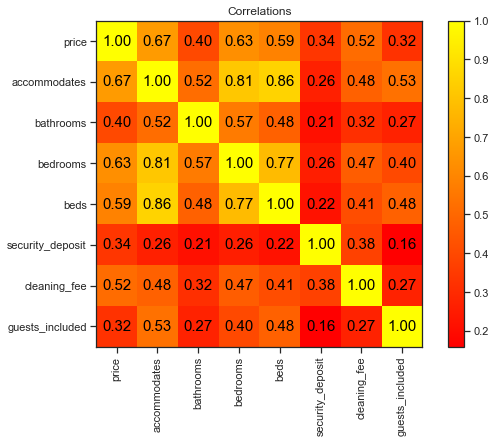

In [22]:
corr = train_cleansed[["price",'accommodates','bathrooms','bedrooms','beds','security_deposit',
'cleaning_fee','guests_included']].corr()
n_var = len(corr) # Number of variables

# Plot the heatmap
plt.imshow(corr, cmap = 'autumn')

plt.xticks(range(n_var), corr.columns)
plt.yticks(range(n_var), corr.columns)
plt.xticks(rotation = 90)

for i in range(n_var):
    for j in range(n_var):
       
        plt.text(i, j, '{:.2f}'.format(corr.iloc[i, j]), ha="center", va="center", color="k", fontsize = 15)

plt.colorbar()

plt.title('Correlations')
plt.savefig('correlation')

## G) EDA - Location <a class="anchor" id="section2_10"></a >

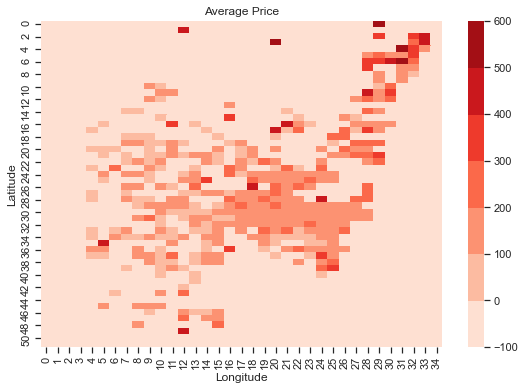

-34.07973789 -33.58955495
151.0401052 151.3399221


In [12]:
location = np.array(train_cleansed[['price','latitude', 'longitude']])
Count = np.zeros((35,52),dtype=int)
Sum = np.zeros((35,52),dtype=float)

def Location2Index(longitude, latitude):
    x = (longitude-151) // 0.01
    y = (latitude+34.1) // 0.01
    return int(x),int(y)

for item in location:
    x,y = Location2Index(item[2],item[1])
    price = item[0]
    Sum[x][y] = Sum[x][y] + price
    Count[x][y] = Count[x][y] + 1

Sum[Count == 0] = -100
Count[Count==0] = 1

Average = Sum / Count
reversed_Average = Average.T[::-1]

cmap=sns.color_palette('Reds', 7)  
fig = sns.heatmap(reversed_Average, cmap=cmap, vmax = 600, vmin = -100)
fig.set_xlabel('Longitude')
fig.set_ylabel('Latitude')
plt.title('Average Price')
plt.show()

print(train_cleansed['latitude'].min(),train_cleansed['latitude'].max())
print(train_cleansed['longitude'].min(),train_cleansed['longitude'].max())


## H) Feature engineering - Location <a class="anchor" id="section2_11"></a >

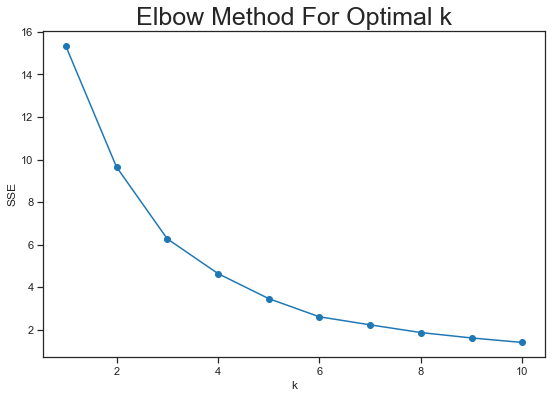

In [13]:
# https://blog.csdn.net/qq_15738501/article/details/79036255

# determine the best k
from sklearn.cluster import KMeans
location = np.array(train_cleansed[['latitude', 'longitude']])
SSE = [] 
for k in range(1,11):
    estimator = KMeans(n_clusters=k)
    estimator.fit(location)
    SSE.append(estimator.inertia_)
X = range(1,11)
plt.xlabel('k')
plt.ylabel('SSE')
plt.title('Elbow Method For Optimal k', fontsize=25)
plt.plot(X,SSE,'o-')

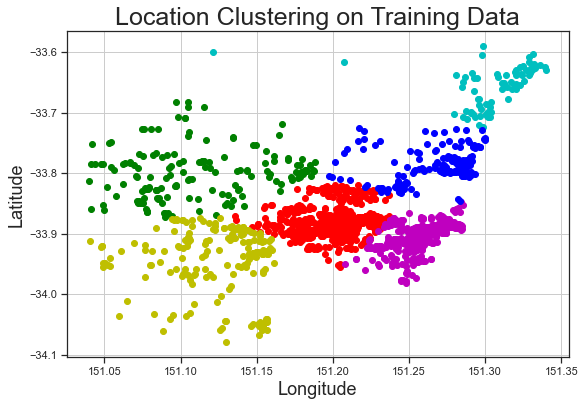

In [14]:
# https://blog.csdn.net/TXK_Kevin/article/details/113714825


n_clusters = 6                 
estimator = KMeans(n_clusters)  
estimator.fit(location)


colors = ['r', 'g', 'm', 'c', 'y', 'b']  
labels = estimator.labels_     
centroids = estimator.cluster_centers_
train_cleansed['location_label'] = labels

plt.figure(figsize=(9, 6))
plt.title("Location Clustering on Training Data", fontsize=25)
plt.xlabel('Longitude', fontsize=18)
plt.ylabel('Latitude', fontsize=18)

for i in range(n_clusters):    
    members = labels == i      # members
    plt.scatter(
        location[members, 1],      # longitude
        location[members, 0],      # latitude   
        c = colors[i]          
    )   

plt.grid()
plt.show()

No handles with labels found to put in legend.


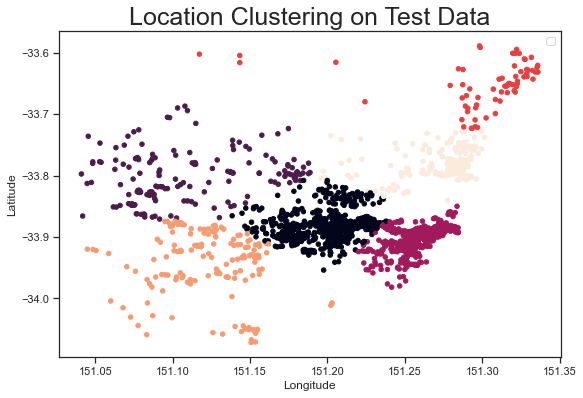

In [15]:
location2 = np.array(test_cleansed[['latitude', 'longitude']])

new_labels = np.zeros(location2.shape[0])

for p in range(location2.shape[0]):
    dists = np.zeros(6)
    for i in range(6):
        dists[i] = np.linalg.norm(location2[p,:] - centroids[i,:])
    new_labels[p] = np.argmin(dists)

test_cleansed['location_label'] = new_labels

plt.scatter(location2[:,1], location2[:,0], s = 20, c = new_labels)

plt.title("Location Clustering on Test Data", fontsize=25)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()
plt.show()

In [16]:
train_cleansed.drop("latitude",inplace=True,axis=1) #remove attribute "latitude" from our dataframe
train_cleansed.drop("longitude",inplace=True,axis=1) #remove attribute "longitude" from our dataframe

test_cleansed.drop("latitude",inplace=True,axis=1) #remove attribute "latitude" from our dataframe
test_cleansed.drop("longitude",inplace=True,axis=1) #remove attribute "longitude" from our dataframe

In [17]:
train_cleansed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1975 entries, 0 to 1999
Data columns (total 47 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Id                                1975 non-null   int64  
 1   price                             1975 non-null   int64  
 2   host_response_rate                1975 non-null   float64
 3   host_acceptance_rate              1975 non-null   float64
 4   host_is_superhost                 1975 non-null   int64  
 5   host_listings_count               1975 non-null   int64  
 6   host_identity_verified            1975 non-null   int64  
 7   accommodates                      1975 non-null   int64  
 8   bathrooms                         1975 non-null   float64
 9   bedrooms                          1975 non-null   float64
 10  beds                              1975 non-null   float64
 11  security_deposit                  1975 non-null   float64
 12  cleani

In [18]:
def prepare_data(df): #Creation of location dummy variables 
    
    df["location_1"]=(df["location_label"]==1).astype(int)
    df["location_2"]=(df["location_label"]==2).astype(int)
    df["location_3"]=(df["location_label"]==3).astype(int)
    df["location_4"]=(df["location_label"]==4).astype(int)
    df["location_5"]=(df["location_label"]==5).astype(int)
    

    return df

train_cleansed = prepare_data(train_cleansed)
test_cleansed=prepare_data(test_cleansed)


In [19]:
train_cleansed.drop("location_label",inplace=True,axis=1)

In [20]:
pd.options.display.max_columns = None
train_cleansed.describe()

,Id,price,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_identity_verified,accommodates,bathrooms,bedrooms,beds,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,require_guest_profile_picture,require_guest_phone_verification,reviews_per_month,within an hour,within a few hours,within a day,a few days or more,House,Townhouse,Other,Entire home/apt,Private room,Shared room,Futon,Pull-out Sofa,Airbed,moderate,strict_14_with_grace_period,super_strict_60,super_strict_30,location_1,location_2,location_3,location_4,location_5
count,1975.000000,1975.000000,1975.000000,1975.000000,1975.000000,1975.000000,1975.000000,1975.000000,1975.000000,1975.000000,1975.000000,1975.000000,1975.000000,1975.000000,1975.000000,1975.000000,1975.000000,1975.000000,1975.000000,1975.000000,1975.000000,1975.000000,1975.000000,1975.000000,1975.000000,1975.000000,1975.000000,1975.000000,1975.000000,1975.000000,1975.000000,1975.000000,1975.000000,1975.000000,1975.000000,1975.000000,1975.000000,1975.000000,1975.000000,1975.000000,1975.000000,1975.000000,1975.000000,1975.000000,1975.000000,1975.000000,1975.000000,1975.000000,1975.000000,1975.000000,1975.000000
mean,2998.345823,158.680000,0.503337,0.531570,0.146835,6.347848,0.375696,3.148354,1.264810,1.464304,1.813165,274.696709,81.650633,1.563544,10.810633,4.426329,672.550886,18.916456,92.999895,9.518762,9.182688,9.680446,9.711653,9.721129,9.295612,0.444557,0.004557,0.004557,1.099823,0.368608,0.083544,0.061772,0.017215,0.212152,0.039494,0.085063,0.640506,0.340759,0.011139,0.001013,0.005063,0.001519,0.250127,0.414684,0.002025,0.001013,0.085063,0.271392,0.035949,0.091139,0.102785
std,577.312748,105.108782,0.488521,0.455694,0.354031,19.380345,0.484425,1.833154,0.504792,0.878435,1.196088,312.161544,58.580926,1.206991,18.412354,8.826110,529.474462,40.363955,9.033345,0.881383,1.111273,0.736181,0.730563,0.635546,0.898603,0.497042,0.067368,0.067368,1.304715,0.482549,0.276773,0.240802,0.130105,0.408935,0.194816,0.279047,0.479974,0.474085,0.104980,0.031814,0.070994,0.038954,0.433195,0.492792,0.044969,0.031814,0.279047,0.444791,0.186211,0.287880,0.303755
min,2000.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,20.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2498.500000,81.000000,0.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,1.000000,1.000000,150.000000,50.000000,1.000000,0.000000,1.000000,30.000000,1.000000,92.993373,9.518592,9.000000,9.680823,9.709742,9.720637,9.000000,0.000000,0.000000,0.000000,0.170000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2999.000000,129.000000,0.710000,0.730000,0.000000,1.000000,0.000000,2.000000,1.000000,1.000000,1.000000,200.000000,75.000000,1.000000,0.000000,2.000000,1125.000000,3.000000,93.000000,10.000000,9.185553,10.000000,10.000000,10.000000,9.295952,0.000000,0.000000,0.000000,0.830000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,3497.500000,200.000000,1.000000,0.990000,0.000000,2.000000,1.000000,4.000000,1.500000,2.000000,2.000000,300.000000,100.000000,2.000000,20.000000,4.000000,1125.000000,17.000000,99.000000,10.000000,10.000000,10.00

## 3.Model building <a class="anchor" id="section3_1"></a >

In [21]:
response="price"
predictors1=list(train_cleansed.columns.values[2:51])
x_train1=train_cleansed[predictors1].copy()
y_train=train_cleansed[response].copy()

x_test = test_cleansed [predictors1].copy()
x_train1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1975 entries, 0 to 1999
Data columns (total 49 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   host_response_rate                1975 non-null   float64
 1   host_acceptance_rate              1975 non-null   float64
 2   host_is_superhost                 1975 non-null   int64  
 3   host_listings_count               1975 non-null   int64  
 4   host_identity_verified            1975 non-null   int64  
 5   accommodates                      1975 non-null   int64  
 6   bathrooms                         1975 non-null   float64
 7   bedrooms                          1975 non-null   float64
 8   beds                              1975 non-null   float64
 9   security_deposit                  1975 non-null   float64
 10  cleaning_fee                      1975 non-null   float64
 11  guests_included                   1975 non-null   int64  
 12  extra_

## A) OLS <a class="anchor" id="section3_2"></a >

In [27]:
from sklearn.linear_model import LinearRegression

ols=LinearRegression()

ols.fit(x_train1,y_train)
y_pred_ols = ols.predict(x_test) # Make predictions on test predictors
print(y_pred_ols) # Print the predictions

[ 72.12261282 221.08862737 153.13808139 ... 176.70796348 103.25073669
  52.38826606]


In [28]:
# Write out submission script in format appropriate for Kaggle
submission = pd.DataFrame(np.c_[test.index, y_pred_ols], columns=['Id', 'price'])
submission['Id'] = submission['Id'].astype('int')
submission.to_csv('kaggle_submission.csv', index=False) 
print(submission)

        Id       price
0        0   72.122613
1        1  221.088627
2        2  153.138081
3        3   96.953881
4        4  119.276378
...    ...         ...
1995  1995  350.888361
1996  1996  261.774341
1997  1997  176.707963
1998  1998  103.250737
1999  1999   52.388266

[2000 rows x 2 columns]


## B) Ridge regression <a class="anchor" id="section3_3"></a >

In [29]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import RidgeCV
warnings.filterwarnings("ignore", category=DeprecationWarning) # This line of code ignores a deprecation warning

alphas = list(np.logspace(-15, 15, 151, base=2))

ridge = Pipeline([
    ('scaler', StandardScaler()),
    ('estimator', RidgeCV(alphas=alphas, cv=5)),
])

ridge.fit(x_train1, y_train)
y_pred_ridge = ridge.predict(x_test) # Make predictions on test predictors
print(y_pred_ridge) # Print the predictions

[ 75.93135517 220.1584284  155.94562741 ... 176.57693564 107.28473674
  57.98856315]


In [30]:
# Write out submission script in format appropriate for Kaggle
submission = pd.DataFrame(np.c_[test.index, y_pred_ridge], columns=['Id', 'price'])
submission['Id'] = submission['Id'].astype('int')
submission.to_csv('kaggle_submission_ridge.csv', index=False) 
print(submission)

        Id       price
0        0   75.931355
1        1  220.158428
2        2  155.945627
3        3   95.465485
4        4  120.744098
...    ...         ...
1995  1995  348.136814
1996  1996  261.642595
1997  1997  176.576936
1998  1998  107.284737
1999  1999   57.988563

[2000 rows x 2 columns]


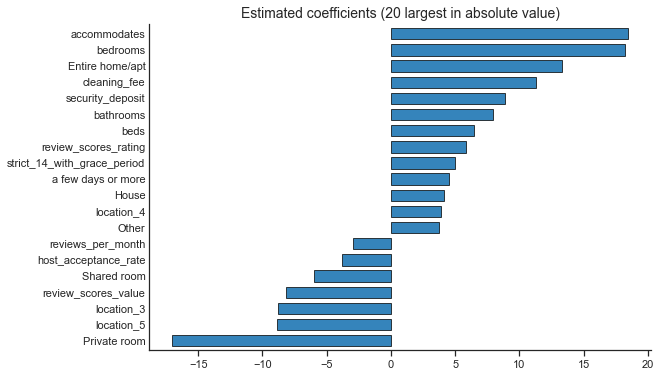

In [31]:
from statlearning import plot_coefficients
plot_coefficients(ridge._final_estimator, predictors1) # the final_estimator attribute refers to the pipeline
plt.show()

## C) Lasso <a class="anchor" id="section3_4"></a >

In [32]:
from sklearn.linear_model import LassoCV
lasso = Pipeline([
    ('scaler', StandardScaler()),
    ('estimator', LassoCV(cv=5)),
])

lasso.fit(x_train1, y_train)
y_pred_lasso = lasso.predict(x_test) # Make predictions on test predictors
print(y_pred_lasso) # Print the predictions

[ 77.60218114 221.25924582 151.48187809 ... 176.17728398 106.86723002
  58.09040533]


In [33]:
# Write out submission script in format appropriate for Kaggle
submission = pd.DataFrame(np.c_[test.index, y_pred_lasso], columns=['Id', 'price'])
submission['Id'] = submission['Id'].astype('int')
submission.to_csv('kaggle_submission_lasso.csv', index=False) 
print(submission)

        Id       price
0        0   77.602181
1        1  221.259246
2        2  151.481878
3        3   97.373233
4        4  114.877616
...    ...         ...
1995  1995  341.293604
1996  1996  261.572527
1997  1997  176.177284
1998  1998  106.867230
1999  1999   58.090405

[2000 rows x 2 columns]


In [34]:
reg = lasso._final_estimator # the final estimator attribute refers to the pipeline
np.sum(reg.coef_ == 0.0)

12

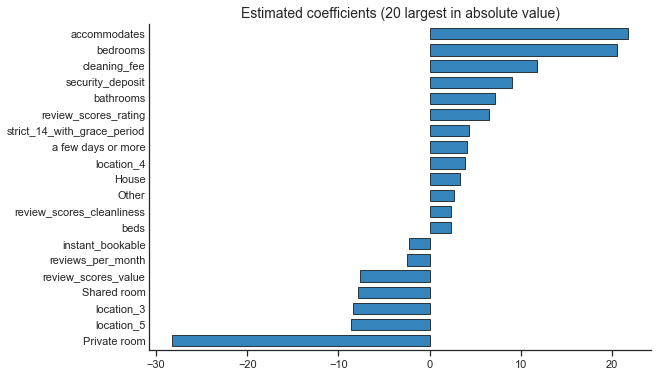

In [35]:
from statlearning import plot_coefficients

plot_coefficients(reg, predictors1)
plt.show()

## D) Elastic Net <a class="anchor" id="section3_5"></a >

In [36]:
from sklearn.linear_model import ElasticNetCV
enet = Pipeline([
    ('scaler', StandardScaler()),
    ('estimator', ElasticNetCV(l1_ratio=[0.01,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9, 0.99], cv=5, n_alphas=200)),
])

enet.fit(x_train1, y_train)
y_pred_enet = enet.predict(x_test) # Make predictions on test predictors
print(y_pred_enet) # Print the predictions

[ 77.23128226 220.08100834 155.01130851 ... 176.13663974 107.6130264
  59.55711648]


In [37]:
# Write out submission script in format appropriate for Kaggle
submission = pd.DataFrame(np.c_[test.index, y_pred_enet], columns=['Id', 'price'])
submission['Id'] = submission['Id'].astype('int')
submission.to_csv('kaggle_submission_enet.csv', index=False) 
print(submission)

        Id       price
0        0   77.231282
1        1  220.081008
2        2  155.011309
3        3   95.879265
4        4  119.212501
...    ...         ...
1995  1995  346.125917
1996  1996  261.621883
1997  1997  176.136640
1998  1998  107.613026
1999  1999   59.557116

[2000 rows x 2 columns]


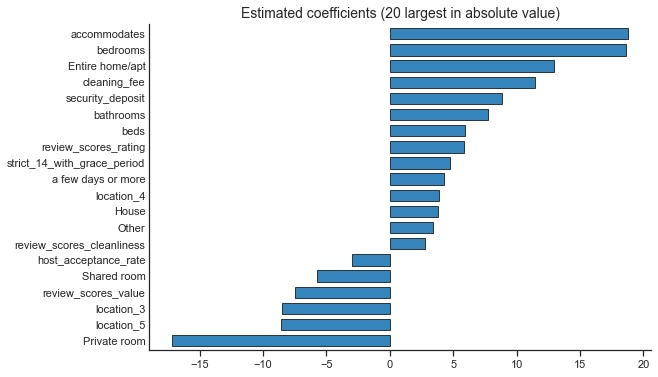

In [38]:
plot_coefficients(enet._final_estimator, predictors1)
plt.show()

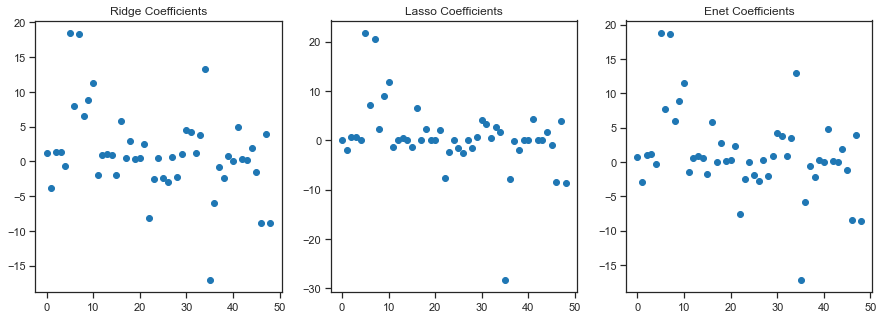

In [39]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.plot(ridge['estimator'].coef_, 'o')
plt.title('Ridge Coefficients')

plt.subplot(1, 3, 2)
plt.plot(lasso['estimator'].coef_, 'o')
plt.title('Lasso Coefficients');

plt.subplot(1, 3, 3)
plt.plot(enet['estimator'].coef_, 'o')
plt.title('Enet Coefficients');

## E) Decision Tree <a class="anchor" id="section3_8"></a >

In [23]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error as MSE
from sklearn.model_selection import cross_val_score

In [41]:
# tuning_parameters
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
warnings.filterwarnings('ignore')

model = DecisionTreeRegressor(criterion = 'mse', random_state=42)
tuning_parameters = {

              "max_depth": np.arange(2,11),
              "min_samples_leaf": np.arange(30,41),       

              }
tree_search = GridSearchCV(model, tuning_parameters, cv=5)
tree_search.fit(x_train1, y_train)
tree = tree_search.best_estimator_
print("R-Squared:{}".format(tree_search.best_score_))
print('Best parameters found by grid search:', tree_search.best_params_, '\n') 

R-Squared:0.5559950957953347
Best parameters found by grid search: {'max_depth': 8, 'min_samples_leaf': 36} 



In [25]:
# fit the model
#dt = DecisionTreeRegressor(random_state=42)
dt = DecisionTreeRegressor(max_depth=8, min_samples_leaf=36, random_state=42)
dt.fit(x_train1, y_train)

y_pred = dt.predict(x_train1)
MSE(y_train,y_pred)

4044.081198081844

In [26]:
# display the tree diagram externally
from sklearn.tree import export_graphviz

dot_data = export_graphviz(dt, out_file=None, feature_names = x_train1.columns.values.tolist(), impurity=False,
                           rounded=True) 
print(dot_data) #copy and paste the output into the WebGraphviz' Text Area

digraph Tree {
node [shape=box, style="rounded", color="black", fontname=helvetica] ;
edge [fontname=helvetica] ;
0 [label="accommodates <= 3.5\nsamples = 1975\nvalue = 158.68"] ;
1 [label="Entire home/apt <= 0.5\nsamples = 1223\nvalue = 109.648"] ;
0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;
2 [label="accommodates <= 1.5\nsamples = 683\nvalue = 76.441"] ;
1 -> 2 ;
3 [label="review_scores_location <= 9.36\nsamples = 193\nvalue = 62.098"] ;
2 -> 3 ;
4 [label="samples = 38\nvalue = 50.053"] ;
3 -> 4 ;
5 [label="minimum_nights <= 5.5\nsamples = 155\nvalue = 65.052"] ;
3 -> 5 ;
6 [label="minimum_nights <= 1.5\nsamples = 116\nvalue = 68.31"] ;
5 -> 6 ;
7 [label="samples = 50\nvalue = 64.02"] ;
6 -> 7 ;
8 [label="samples = 66\nvalue = 71.561"] ;
6 -> 8 ;
9 [label="samples = 39\nvalue = 55.359"] ;
5 -> 9 ;
10 [label="guests_included <= 1.5\nsamples = 490\nvalue = 82.09"] ;
2 -> 10 ;
11 [label="extra_people <= 3.5\nsamples = 443\nvalue = 80.312"] ;
10 -> 11 ;
12 [label="secur

In [44]:
# Write out submission script in format appropriate for Kaggle
submission = pd.DataFrame(np.c_[test.index, y_pred_tree_search], columns=['Id', 'price'])
submission['Id'] = submission['Id'].astype('int')
submission.to_csv('kaggle_submission_tree_search.csv', index=False) 
print(submission)

        Id       price
0        0   71.560606
1        1  127.565217
2        2  158.301587
3        3   81.447514
4        4  148.333333
...    ...         ...
1995  1995  291.775510
1996  1996  291.775510
1997  1997  157.688889
1998  1998   55.358974
1999  1999   64.020000

[2000 rows x 2 columns]


## F) RandomForestRegressor <a class="anchor" id="section3_9"></a >

In [46]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [47]:
rfr = RandomForestRegressor(random_state=42)
CV_rfr = GridSearchCV(estimator=rfr, param_grid={ 
                        'n_estimators': np.arange(500,1000,100),
                        'max_features': np.arange(4,10,1),
                        'max_depth' : np.arange(10,25,1),
                    }, cv= 5, scoring = 'neg_mean_squared_error', n_jobs=-1, verbose=4)
CV_rfr.fit(x_train1, y_train)

Fitting 5 folds for each of 450 candidates, totalling 2250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    6.9s
[Parallel(n_jobs=-1)]: Done  82 tasks      | elapsed:   31.1s
[Parallel(n_jobs=-1)]: Done 205 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 376 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 597 tasks      | elapsed:  4.3min
[Parallel(n_jobs=-1)]: Done 866 tasks      | elapsed:  6.2min
[Parallel(n_jobs=-1)]: Done 1185 tasks      | elapsed:  8.6min
[Parallel(n_jobs=-1)]: Done 1552 tasks      | elapsed: 11.5min
[Parallel(n_jobs=-1)]: Done 1969 tasks      | elapsed: 14.7min
[Parallel(n_jobs=-1)]: Done 2250 out of 2250 | elapsed: 16.7min finished


GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': array([10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24]),
                         'max_features': array([4, 5, 6, 7, 8, 9]),
                         'n_estimators': array([500, 600, 700, 800, 900])},
             scoring='neg_mean_squared_error', verbose=4)

In [109]:
dt = RandomForestRegressor(max_depth = 16, max_features = 5, n_estimators = 500)
dt.fit(x_train1, y_train)

y_pred = dt.predict(x_train1)
MSE(y_train,y_pred)

851.4275553802994

In [49]:
y_pred_CV_rfr = CV_rfr.predict(x_test) # Make predictions on test predictors
print(y_pred_CV_rfr) # Print the predictions

[ 77.68865023 194.45228293 167.19632729 ... 171.11444867  77.3174496
  62.17070241]


In [50]:
# Write out submission script in format appropriate for Kaggle
submission = pd.DataFrame(np.c_[test.index, y_pred_CV_rfr], columns=['Id', 'price'])
submission['Id'] = submission['Id'].astype('int')
submission.to_csv('kaggle_submission_CV_rfr.csv', index=False) 
print(submission)

        Id       price
0        0   77.688650
1        1  194.452283
2        2  167.196327
3        3   89.587708
4        4  127.748896
...    ...         ...
1995  1995  336.491600
1996  1996  271.480509
1997  1997  171.114449
1998  1998   77.317450
1999  1999   62.170702

[2000 rows x 2 columns]


In [51]:
CV_rfr.best_params_

{'max_depth': 16, 'max_features': 5, 'n_estimators': 500}

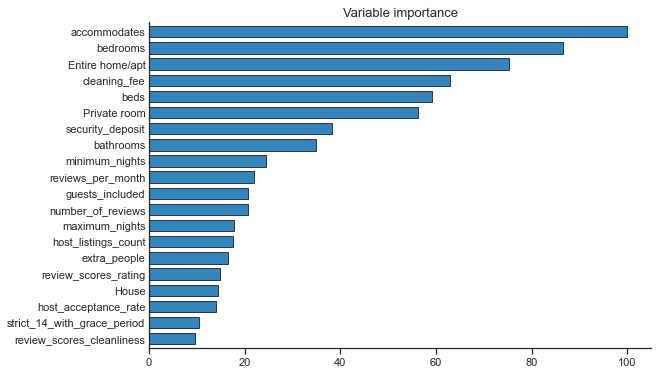

In [52]:
from statlearning import plot_feature_importance

rfr = CV_rfr.best_estimator_
plot_feature_importance(rfr, predictors1)
plt.show()

## G) XGboosting <a class="anchor" id="section3_10"></a >

In [61]:
from sklearn.ensemble import GradientBoostingRegressor
from statlearning import plot_feature_importance
import xgboost as xgb

In [62]:
%%time

model = xgb.XGBRegressor()

tuning_parameters = {
    'learning_rate': np.arange(0.05,0.2,0.01),
    'max_depth' : np.arange(10,25,1),
    'n_estimators' : np.arange(500,1500,10),
    'subsample' :np.arange(0.5,0.9,0.1)
}

gb_search = RandomizedSearchCV(model, tuning_parameters, n_iter = 10, cv = 10, return_train_score=False, n_jobs=-1,verbose=4,
                              random_state = 20)
gb_search.fit(x_train1, y_train)

xbst = gb_search.best_estimator_

print('Best parameters found by randomised search:', gb_search.best_params_, '\n')

Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done  82 tasks      | elapsed: 20.3min
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed: 23.6min finished


Best parameters found by randomised search: {'subsample': 0.7999999999999999, 'n_estimators': 1280, 'max_depth': 19, 'learning_rate': 0.05} 

CPU times: user 51.4 s, sys: 1.52 s, total: 52.9 s
Wall time: 23min 46s


In [63]:
y_pred_gb_search = gb_search.predict(x_test) # Make predictions on test predictors
print(y_pred_gb_search) # Print the predictions

[ 69.898575 137.03429  162.1022   ... 179.8451    69.65685   51.377113]


In [64]:
# Write out submission script in format appropriate for Kaggle
submission = pd.DataFrame(np.c_[test.index, y_pred_gb_search], columns=['Id', 'price'])
submission['Id'] = submission['Id'].astype('int')
submission.to_csv('kaggle_submission_gb_search.csv', index=False) 
print(submission)

        Id       price
0        0   69.898575
1        1  137.034286
2        2  162.102203
3        3  117.592682
4        4  110.466148
...    ...         ...
1995  1995  325.507355
1996  1996  291.964752
1997  1997  179.845093
1998  1998   69.656853
1999  1999   51.377113

[2000 rows x 2 columns]


In [65]:
%%time

dtrain = xgb.DMatrix(x_train1, y_train) # we need to convert the data to the format required by xgboost
dtest  = xgb.DMatrix(x_test)

param = {
    'max_depth': 15, 
    'learning_rate': 0.060000000000000005, 
    'subsample': 0.7,
    'objective': 'reg:squarederror',  
     }

cv = xgb.cv(param, dtrain, num_boost_round = 1580, nfold=10, early_stopping_rounds=50, verbose_eval=False)

print(f'Selected number of boosting iterations: {cv.shape[0]}')
print(f'RMSE (CV): {cv.iloc[-1,0]:.4f}');

Selected number of boosting iterations: 82
RMSE (CV): 11.1008
CPU times: user 53.6 s, sys: 923 ms, total: 54.6 s
Wall time: 7.24 s


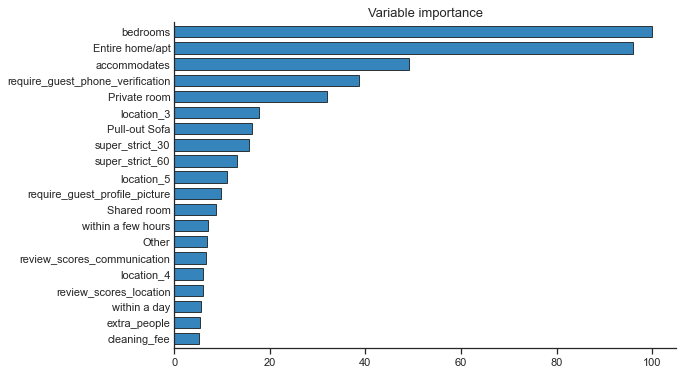

In [66]:
from statlearning import plot_feature_importance

plot_feature_importance(xbst, predictors1)
plt.show()

## I) Model Stacking  <a class="anchor" id="section3_12"></a >

In [69]:
%%time
from mlxtend.regressor import StackingCVRegressor
from sklearn.tree import export_graphviz
models = [ols, lasso, enet, ridge,tree_search,xbst,CV_rfr]

stack = StackingCVRegressor(models, meta_regressor = LinearRegression(), cv = 5, n_jobs=-1, verbose=4)
stack.fit(x_train1.values, y_train.ravel())

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    0.1s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    0.1s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    1.3s remaining:    2.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    1.8s remaining:    2.6s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_

Fitting 5 folds for each of 450 candidates, totalling 2250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    3.3s
[Parallel(n_jobs=-1)]: Done  82 tasks      | elapsed:   24.0s
[Parallel(n_jobs=-1)]: Done 205 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 376 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 597 tasks      | elapsed:  3.3min
[Parallel(n_jobs=-1)]: Done 866 tasks      | elapsed:  4.9min
[Parallel(n_jobs=-1)]: Done 1185 tasks      | elapsed:  6.9min
[Parallel(n_jobs=-1)]: Done 1552 tasks      | elapsed:  9.3min
[Parallel(n_jobs=-1)]: Done 1969 tasks      | elapsed: 12.1min
[Parallel(n_jobs=-1)]: Done 2250 out of 2250 | elapsed: 14.0min finished


CPU times: user 1min 2s, sys: 1.81 s, total: 1min 3s
Wall time: 1h 25min 13s


StackingCVRegressor(meta_regressor=LinearRegression(), n_jobs=-1,
                    regressors=[LinearRegression(),
                                Pipeline(steps=[('scaler', StandardScaler()),
                                                ('estimator', LassoCV(cv=5))]),
                                Pipeline(steps=[('scaler', StandardScaler()),
                                                ('estimator',
                                                 ElasticNetCV(cv=5,
                                                              l1_ratio=[0.01,
                                                                        0.1,
                                                                        0.2,
                                                                        0.3,
                                                                        0.4,
                                                                        0.5,
                                                     

In [70]:
y_pred_stack = stack.predict(x_test) # Make predictions on test predictors
print(y_pred_stack) # Print the predictions

[ 71.7349973  198.97593461 164.30570772 ... 177.45533929  81.87242662
  52.50407955]


In [71]:
# Write out submission script in format appropriate for Kaggle
submission = pd.DataFrame(np.c_[test.index, y_pred_stack], columns=['Id', 'price'])
submission['Id'] = submission['Id'].astype('int')
submission.to_csv('kaggle_submission_stack.csv', index=False) 
print(submission)

        Id       price
0        0   71.734997
1        1  198.975935
2        2  164.305708
3        3   96.058590
4        4  116.209400
...    ...         ...
1995  1995  352.754242
1996  1996  276.875032
1997  1997  177.455339
1998  1998   81.872427
1999  1999   52.504080

[2000 rows x 2 columns]


In [ ]:
from statlearning import plot_coefficients

plot_coefficients(stack.meta_regr_, labels = ['OLS', 'Lasso', 'enet','Ridge','Treesearch','xbst','CV_rfr'])
plt.show()

## Further work

## KNN 

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression

In [ ]:
from sklearn.model_selection import GridSearchCV

model = KNeighborsRegressor() 
    
tuning_parameters = {
    'n_neighbors': np.arange(1,30),
}

knn_search =  GridSearchCV(model, tuning_parameters, cv=5,  scoring = 'neg_mean_squared_error', 
                           return_train_score=False, n_jobs=-1)
knn_search.fit(x_train1, y_train)

In [ ]:
knn_search.best_params_

## Randomised search

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

model = KNeighborsRegressor() 

tuning_parameters = {
    'n_neighbors': np.arange(1,101),
}

knn_rs =  RandomizedSearchCV(model, tuning_parameters, cv=5,  n_iter=20, scoring = 'neg_mean_squared_error',
                             return_train_score=False, n_jobs=-1)
knn_rs.fit(x_train1, y_train)
knn_rs.best_params_

In [ ]:
knn = KNeighborsRegressor(n_neighbors=9) 

from sklearn.model_selection import cross_val_score
scores = cross_val_score(knn, x_train1, y_train, cv=5, scoring = 'neg_mean_squared_error')
scores

In [ ]:
neighbours=np.arange(1, 30)

cv_rmse = []
for k in neighbours: 
    model = KNeighborsRegressor(n_neighbors= k) 
    scores = cross_val_score(model, x_train1, y_train, cv=5, scoring = 'neg_mean_squared_error')
    rmse = np.sqrt(-1*np.mean(scores))
    cv_rmse.append(rmse)

fig, ax= plt.subplots()
ax.plot(neighbours, cv_rmse)
ax.set_xlabel('Number of neighbours')
ax.set_ylabel('Cross Validation RMSE')
sns.despine()
plt.show()
  
print(f'Lowest CV error: K = {1 + np.argmin(cv_rmse)}')   

In [ ]:
# Training
ols.fit(x_train1, y_train)
knn.fit(x_train1, y_train)

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# Initialise table
columns=['RMSE', 'R-Squared']
rows=['Linear Regression', 'KNN']
results =pd.DataFrame(0.0, columns=columns, index=rows)

# List algorithms
methods = [ols, knn] 

# Computer test predictions and metrics
for i, method in enumerate(methods):
    y_pred = method.predict(x_test)
    results.iloc[i, 0] = np.sqrt(mean_squared_error(x_train1, x_test))
    results.iloc[i, 1] = r2_score(x_train1, x_test)

results.round(2)

## Additive Boosting 

In [ ]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor
import xgboost as xgb
from mlxtend.regressor import StackingCVRegressor
from sklearn.tree import export_graphviz

y_fit = lasso.predict(x_train1)
resid = y_train - y_fit

model = xgb.XGBRegressor()

tuning_parameters = {
    'learning_rate': np.arange(0.01, 0.2, 0.01),
    'n_estimators' : np.arange(250, 1000, 100),
    'max_depth' : np.arange(2, 10, 1),
    'subsample' : np.arange(0.5, 1, 0.1),
}

gb_search = RandomizedSearchCV(model, tuning_parameters, n_iter = 16, cv = 5, return_train_score=False, n_jobs=4,
                              random_state = 20)
gb_search.fit(x_train1, resid)

abst = gb_search.best_estimator_


print('Best parameters found by randomised search:', gb_search.best_params_, '\n')

In [ ]:
y_pred_gb_search1 = gb_search.predict(x_test) # Make predictions on test predictors
print(y_pred_gb_search1) # Print the predictions

In [ ]:
# Write out submission script in format appropriate for Kaggle
submission = pd.DataFrame(np.c_[test.index, y_pred_gb_search1], columns=['Id', 'price'])
submission['Id'] = submission['Id'].astype('int')
submission.to_csv('kaggle_submission_gb_search1.csv', index=False) 
print(submission)

In [ ]:
from statlearning import plot_feature_importance

plot_feature_importance(abst, predictors1)
plt.show()

In [ ]:
%%time

models = [ols, lasso, enet, ridge,knn, knn_rs, tree_search,xbst,CV_rfr]

stack5 = StackingCVRegressor(models, meta_regressor = LinearRegression(), cv = 5, n_jobs=-1, verbose=4)
stack5.fit(x_train1.values, y_train.ravel())

In [ ]:
from statlearning import plot_coefficients

plot_coefficients(stack5.meta_regr_, labels = ['OLS', 'Lasso', 'enet','Ridge','KNN','KNN_rs','Treesearch','xbst','CV_rfr'])
plt.show()

In [ ]:
y_pred_stack5 = stack5.predict(x_test) # Make predictions on test predictors
print(y_pred_stack5) # Print the predictions

In [ ]:
# Write out submission script in format appropriate for Kaggle
submission = pd.DataFrame(np.c_[test.index, y_pred_stack5], columns=['Id', 'price'])
submission['Id'] = submission['Id'].astype('int')
submission.to_csv('kaggle_submission_stack1.csv', index=False) 
print(submission)

In [ ]:
%%time
from xgboost import XGBRegressor

models1 = [ols, lasso, enet, ridge,knn, knn_rs, tree_search,xbst,CV_rfr]

stack2 = StackingCVRegressor(models1, meta_regressor = XGBRegressor(), cv = 5, n_jobs=-1, verbose=4)
stack2.fit(x_train1.values, y_train.ravel())

In [ ]:
y_pred_stack2 = stack2.predict(x_test) # Make predictions on test predictors
print(y_pred_stack2) # Print the predictions

In [ ]:
# Write out submission script in format appropriate for Kaggle
submission = pd.DataFrame(np.c_[test.index, y_pred_stack2], columns=['Id', 'price'])
submission['Id'] = submission['Id'].astype('int')
submission.to_csv('kaggle_submission_stack2.csv', index=False) 
print(submission)

In [ ]:
%%time
from xgboost import XGBRegressor

models1 = [ols, lasso, enet, ridge,tree_search,xbst,CV_rfr]

stack3 = StackingCVRegressor(models1, meta_regressor = XGBRegressor(), cv = 5, n_jobs=-1, verbose=4)
stack3.fit(x_train1.values, y_train.ravel())

In [ ]:
y_pred_stack3 = stack3.predict(x_test) # Make predictions on test predictors
print(y_pred_stack3) # Print the predictions

In [ ]:
# Write out submission script in format appropriate for Kaggle
submission = pd.DataFrame(np.c_[test.index, y_pred_stack3], columns=['Id', 'price'])
submission['Id'] = submission['Id'].astype('int')
submission.to_csv('kaggle_submission_stack3.csv', index=False) 
print(submission)

In [ ]:
%%time

models = [lasso ,tree_search, xbst, CV_rfr]

stack4 = StackingCVRegressor(models, meta_regressor = LinearRegression(), cv = 5, n_jobs=-1, verbose=4)
stack4.fit(x_train1.values, y_train.ravel())

In [ ]:
y_pred_stack4 = stack4.predict(x_test) # Make predictions on test predictors
print(y_pred_stack4) # Print the predictions

In [ ]:
# Write out submission script in format appropriate for Kaggle
submission = pd.DataFrame(np.c_[test.index, y_pred_stack4], columns=['Id', 'price'])
submission['Id'] = submission['Id'].astype('int')
submission.to_csv('kaggle_submission_stack4.csv', index=False) 
print(submission)
